# Project Walkthrough

## Objective

## Guiding Questions:

## Key Findings:

### Imports and setup

In [288]:
# must go first
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Reloads functions each time so you can edit a script 
# and not need to restart the kernel
%load_ext autoreload
%autoreload 2

# plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context("poster", font_scale=1.3)
import folium

import sys
import os
import datetime

sns.set()
sns.set_context('poster', font_scale=1.3)
sns.set_style("white")

import warnings
warnings.filterwarnings('ignore')

# basic wrangling
import pandas as pd
import numpy as np
import yaml
import json
import re

# eda tools
import missingno as msno
import collections
import itertools
from tqdm import tqdm
import nltk

# pandas options
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 75)
pd.set_option('display.width', 1000)

# Update matplotlib defaults to something nicer
mpl_update = {
    'font.size': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'figure.figsize': [12.0, 8.0],
    'axes.labelsize': 20,
    'axes.labelcolor': '#677385',
    'axes.titlesize': 20,
    'lines.color': '#0055A7',
    'lines.linewidth': 3,
    'text.color': '#677385',
    'font.family': 'sans-serif',
    'font.sans-serif': 'Tahoma'
}
mpl.rcParams.update(mpl_update)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [289]:
# Create helper functions for specifying paths and appending
# directories with relevant python source code.
# This is a lot at the top of your notebook but if you get the jupyter
# extension for collapsing headings, you can always have this and the
# imports collapsed

root_dir = os.curdir
max_nest = 10  # arbitrary, 3 would probably suffice
nest = 0
while "src" not in os.listdir(root_dir) and nest < max_nest:
    # Look up the directory structure for a src directory
    root_dir = os.path.join(os.pardir, root_dir)
    nest += 1
    
# If you don't find the src directory, the root directory is this directory
root_dir = os.path.abspath(root_dir) if nest < max_nest else os.path.abspath(
    os.curdir)

# Add the root directory to be able to import from src, etc
sys.path.append(root_dir)

# Get the source directory and append path to access
# python packages/scripts within directory
if "src" in os.listdir(root_dir):
    src_dir = os.path.join(root_dir, "src")

# If data or figures directory don't exist in project directory,
# they will be saved to this directory
data_dir = os.path.join(
    root_dir, "data") if "data" in os.listdir(root_dir) else os.curdir
external_data_dir = os.path.join(
    data_dir, "external") if "external" in os.listdir(data_dir) else os.curdir
figure_dir = os.path.join(
    root_dir,
    "figures") if "figures" in os.listdir(root_dir) else os.curdir
models_dir = os.path.join(
    root_dir,
    "models") if "models" in os.listdir(root_dir) else os.curdir

# Prepends the directory path for specifying paths to data or figures
# dataplus("data.csv") -> "/Users/cmawer/project/data/data.csv"
# figplus("cool.png") -> "/Users/cmawer/project/figures/cool.png"
dataplus = lambda x: os.path.join(data_dir, x)
dataextplus = lambda x: os.path.join(external_data_dir, x)
figplus = lambda x: os.path.join(figure_dir, x)
modelsplus = lambda x: os.path.join(models_dir, x)

# Prepends the date to a string (e.g. to save dated files)
# dateplus("cool-figure.png") -> "2018-12-05-cool-figure.png"
now = datetime.datetime.now().strftime("%Y-%m-%d")
dateplus = lambda x: "%s-%s" % (now, x)

In [290]:
# For later when src code is written

# # Import from project src 
# from src import load_data as ld
# from src import generate_features as gf 
# from src.helpers.helpers import Timer

In [291]:
# For later when RDS is set up

# # connect to databases 
# import sqlalchemy as sql

# sqltype = "mysql+pymysql"
# database = ""
# host =  os.environ.get('amazonRDS_host')
# port =  os.environ.get('amazonRDS_port')
# user = os.environ.get('amazonRDS_user')
# password = os.environ.get('amazonRDS_pw')

# engine_string = "{sqltype}://{username}:{password}@{host}:{port}/{database}"
# engine_string = engine_string.format(sqltype=sqltype, username=username,
#                                      password=password, host=host, 
#                                      port=port, database=database)
# conn = sqlalchemy.create_engine(engine_string)

# %reload_ext sql_magic
# %config SQL.conn_name = 'engine'
# %config SQL.output_result = False  # disable browser notifications
# %config SQL.notify_result= True # Browser notification when query finishes

In [292]:
# To convert to html with collapsible headings and table of contents
# change filename and run cell
filename = "template.ipynb"
! jupyter nbconvert --to html_ch {filename} --template toc2

[NbConvertApp] WARNING | pattern 'template.ipynb' matched no files
Traceback (most recent call last):
  File "/Applications/anaconda3/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/Applications/anaconda3/lib/python3.6/site-packages/jupyter_core/application.py", line 266, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/Applications/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Applications/anaconda3/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 325, in start
    self.convert_notebooks()
  File "/Applications/anaconda3/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 482, in convert_notebooks
    cls = get_exporter(self.export_format)
  File "/Applications/anaconda3/lib/python3.6/site-packages/nbconvert/exporters/base.py", line 110, in get_exporter
    % (name, ', '.join(get_export_names())))
ValueError: 

## Data

- Raw file/table name: 
- Table generation date: 
- Description of data: 
- Date range covered by data: 
- Included population: 
- Associated query file: 

In [293]:
# To read file from project/data/
company_df = pd.read_csv(dataextplus('companies.csv'))
rounds_df = pd.read_csv(dataextplus('rounds.csv'))
investments_df = pd.read_csv(dataextplus('investments.csv'))
acquisitions_df = pd.read_csv(dataextplus('acquisitions.csv'))
ipo_df = pd.read_csv(dataextplus('ipo_counts.csv'))

# # To ingest data from SQL query
# table_name = "table_name"


# %%read_sql df -a
# SELECT *
# FROM 
#     {table_name}
# LIMIT 5

## Analysis

## Companies

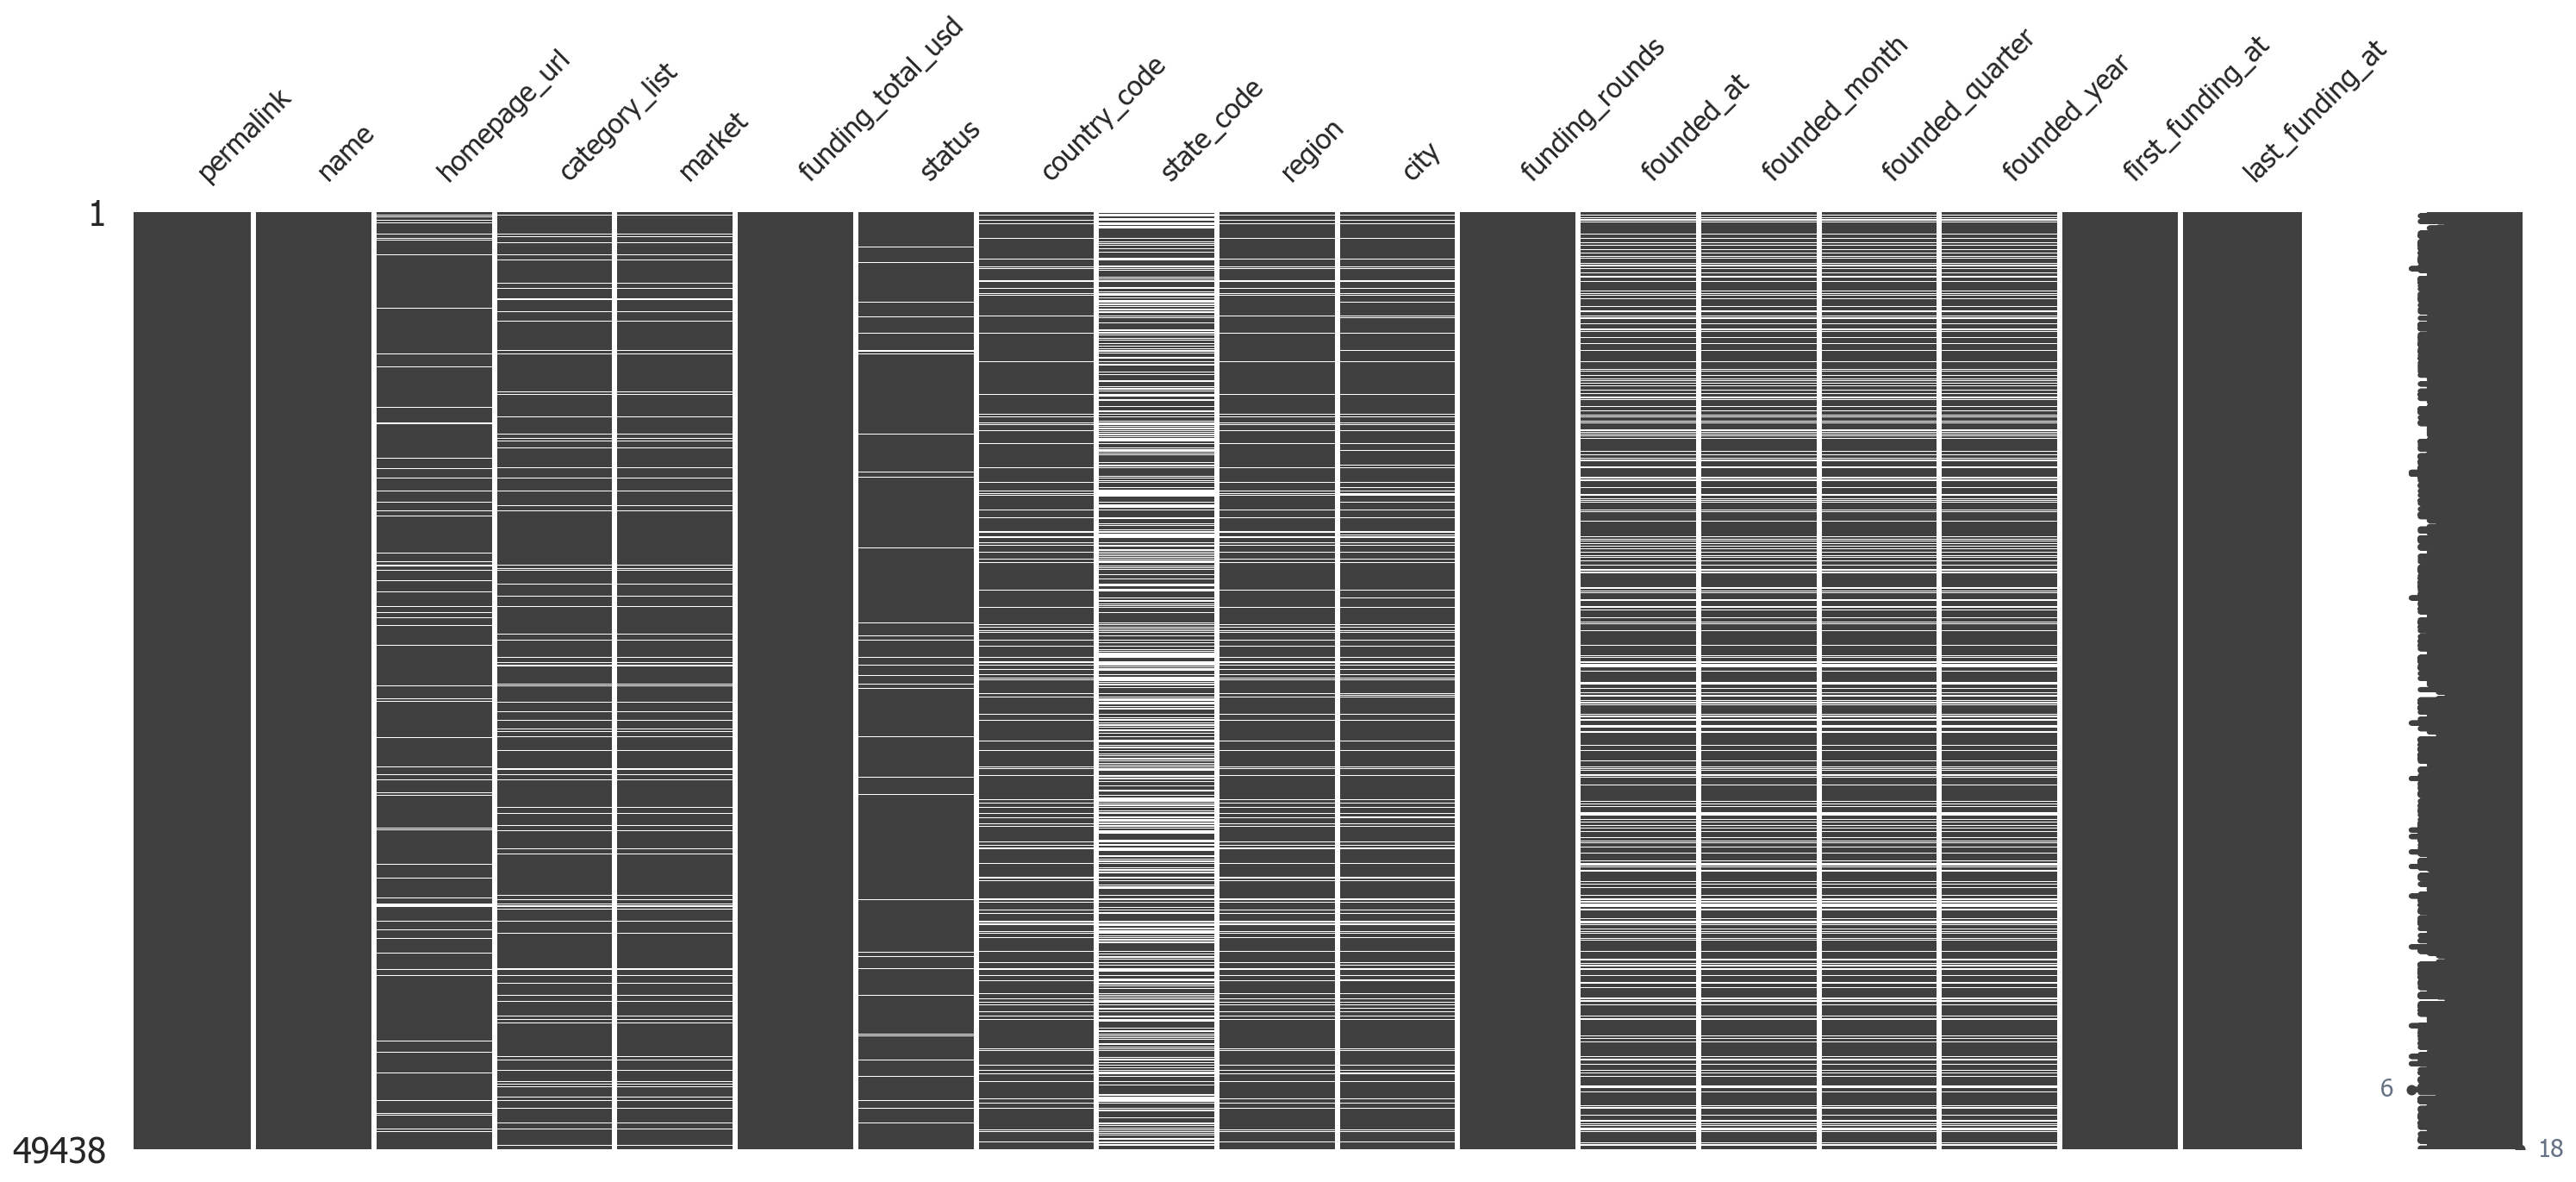

In [294]:
# Missing values in company dataframe
msno.matrix(company_df)

In [295]:
# Drop if market is empty
company_df = company_df.dropna(subset = ['market'])

In [296]:
# Basic dataframe shape and columns.
print(company_df.shape, company_df.columns)

(45470, 18) Index(['permalink', 'name', 'homepage_url', 'category_list', 'market', 'funding_total_usd', 'status', 'country_code', 'state_code', 'region', 'city', 'funding_rounds', 'founded_at', 'founded_month', 'founded_quarter', 'founded_year', 'first_funding_at', 'last_funding_at'], dtype='object')


In [297]:
# Keep columns that are relevant.
company_df = company_df[['permalink', 'name', 'market', 'category_list', 'funding_total_usd', 'status', 'country_code', 'funding_rounds', 'founded_at', 'founded_month', 'founded_quarter', 'founded_year', 'first_funding_at', 'last_funding_at']]

# Lower case if a column is of string type.
company_df = company_df.apply(lambda column: column.str.lower() if pd.api.types.is_string_dtype(column) else column)

In [298]:
# Check number of unique market types.
len(company_df['market'].unique())

753

In [299]:
# Save list of all market types.
market_types = list(company_df['market'].unique())

# Save list of top 50 market types by company counts.
top_50_markets = list(company_df['market'].value_counts().nlargest(50).index)

outside_50_markets = [x for x in market_types if x not in top_50_markets]

# Create dictionary of top 50 markets.
top_50_dict = dict.fromkeys(top_50_markets)

In [300]:
# First pass at collapsing market categories.
# Done by checking if first word in a category is present in other category labels.
# Example 1: word "advertising" apppears in "advertising platforms".
# Example 2: "enterprise" is the first word in "enterprise software" apppears in "enterprise 2.0"

for key in tqdm(top_50_dict.keys()):
    # Initialize each key with empty list
    top_50_dict[key] = []
    for cat in outside_50_markets:
        # Check if first word is present in category, add to key value list, remove from category list.
        if key.split(' ')[0] in cat.split(' '):
            top_50_dict[key].append(cat)
            outside_50_markets.remove(cat)
        elif (len(key.split(' ')) > 1) and (key.split(' ')[1] == 'and') and (key.split(' ')[2] in cat.split(' ')):
            top_50_dict[key].append(cat)
            outside_50_markets.remove(cat)

# Check how many categories are left.
remainder_outside_50 = outside_50_markets
len(remainder_outside_50)

100%|██████████| 50/50 [00:00<00:00, 646.65it/s]


534

In [301]:
# Second pass at collapsing market categories.
# Market category labels are split into character n-grams.
# N-gram similarity Dice metric is calculated with intersection/union of n-gram sets.

def word2ngrams(text, n=4, exact=True):
    """Convert text into ngrams."""
    return ["".join(g) for g in zip(*[text[i:] for i in range(n)])]

def sim4gram(text1, text2):
    """Calculate ngram similarity metric."""
    list1 = word2ngrams(text1)
    list2 = word2ngrams(text2)
    return len(list(set(list1) & set(list2)))/len(list(set(list1) | set(list2)))

for key in tqdm(top_50_dict.keys()):
    for cat in remainder_outside_50:
        if sim4gram(key, cat) > 0.25:
            top_50_dict[key].append(cat)
            remainder_outside_50.remove(cat)

# Check how many categories are left.
len(remainder_outside_50)

100%|██████████| 50/50 [00:00<00:00, 101.70it/s]


518

In [302]:
# Assign remainder of categories to "Other"
top_50_dict['other'] = remainder_outside_50

In [303]:
def invert_dict(d):
    """Function to invert a dictionary of lists so list values become keys."""
    return dict( (v,k) for k in d for v in d[k] )

category_replace_dict = invert_dict(top_50_dict)

In [304]:
# Relabel key value pairs that do not match well.
category_replace_dict['big data analytics'] = 'big data'
category_replace_dict['coworking'] = 'other'
category_replace_dict['mining technologies'] = 'other'
category_replace_dict['mobility'] = 'other'
category_replace_dict['nanotechnology'] = 'other'
category_replace_dict['real time'] = 'other'
category_replace_dict['space travel'] = 'other'
category_replace_dict['social network media'] = 'social media'

# Replace values in market column based on replacement dictionary.
company_df['market'] = company_df['market'].map(category_replace_dict).fillna(company_df['market'])

In [305]:
# One-hot encoding of startup status.
company_df['status'].value_counts()

company_df = pd.concat([company_df, pd.get_dummies(company_df['status'], prefix='status')], axis=1)
company_df = company_df.drop('status', axis=1)

In [306]:
#  Countries with startup numbers above global mean.
top_countries = list(company_df['country_code'].value_counts()[company_df['country_code'].value_counts() > company_df['country_code'].value_counts().mean()].index)

# Replace other countries with 'other'.
company_df['country_code'] = company_df['country_code'].fillna('other')
company_df.loc[~company_df['country_code'].isin(top_countries), 'country_code'] = 'other'

# One-hot encoding of countries.
company_df = pd.concat([company_df, pd.get_dummies(company_df['country_code'], prefix='country')], axis=1)
company_df = company_df.drop('country_code', axis=1)
company_df.columns

Index(['permalink', 'name', 'market', 'category_list', 'funding_total_usd', 'funding_rounds', 'founded_at', 'founded_month', 'founded_quarter', 'founded_year', 'first_funding_at', 'last_funding_at', 'status_acquired', 'status_closed', 'status_operating', 'country_can', 'country_chn', 'country_deu', 'country_esp', 'country_fra', 'country_gbr', 'country_ind', 'country_isr', 'country_other', 'country_usa'], dtype='object')

In [307]:
# Impute missing founding dates.
# Convert datetime columns to datetime objects.
company_df['first_funding_at'] = pd.to_datetime(company_df['first_funding_at'], errors='coerce')
company_df['last_funding_at'] = pd.to_datetime(company_df['last_funding_at'], errors='coerce')
company_df['founded_at'] = pd.to_datetime(company_df['founded_at'], errors='coerce')

# Save two date columns in new dataframe to calculate median value.
median_days_to_fund = np.median(((company_df['first_funding_at'] - company_df['founded_at'])/(np.timedelta64(1, 'D'))).dropna())

# Impute NAs for founded_at by subtracting median_days_to_fund to first_funding_at.
company_df['founded_at'] = company_df['founded_at'].fillna(company_df['first_funding_at'] - timedelta(days = median_days_to_fund))

# Filling in founded date features based on imputed values.
company_df['founded_year'] = company_df['founded_at'].dt.year
company_df['founded_month'] = company_df['founded_at'].dt.month
company_df['founded_quarter'] = company_df['founded_month'].map({1:1,2:1,3:1,4:2,5:2,6:2,7:3,8:3,9:3,10:4,11:4,12:4})

In [308]:
# Feature generation for temporal features.

# Number of days and months from first founding date that first round was raised.
company_df['days_to_fund'] = (company_df['first_funding_at'] - company_df['founded_at'])/(np.timedelta64(1, 'D'))
company_df['months_to_fund'] = (company_df['first_funding_at'] - company_df['founded_at'])/(np.timedelta64(1, 'M'))

# Number of days and months between funding rounds.
company_df['days_between_rounds'] = (company_df['last_funding_at'] - company_df['first_funding_at'])/(np.timedelta64(1, 'D'))/company_df['funding_rounds']
company_df['months_between_rounds'] = (company_df['last_funding_at'] - company_df['first_funding_at'])/(np.timedelta64(1, 'M'))/company_df['funding_rounds']

# If only a single round, use value of days or months to first funding.
company_df.loc[company_df['days_between_rounds'] == 0, 'days_between_rounds'] = company_df['days_to_fund']
company_df.loc[company_df['months_between_rounds'] == 0, 'months_between_rounds'] = company_df['months_to_fund']

In [309]:
company_df.describe()

,funding_total_usd,funding_rounds,founded_month,founded_quarter,founded_year,status_acquired,status_closed,status_operating,country_can,country_chn,country_deu,country_esp,country_fra,country_gbr,country_ind,country_isr,country_other,country_usa,days_to_fund,months_to_fund,days_between_rounds,months_between_rounds
count,4.547000e+04,45470.000000,45467.000000,45467.000000,45467.000000,45470.000000,45470.000000,45470.000000,45470.000000,45470.000000,45470.000000,45470.000000,45470.000000,45470.000000,45470.000000,45470.000000,45470.000000,45470.000000,45461.000000,45461.000000,45461.000000,45461.000000
mean,1.378180e+07,1.746624,4.027382,1.822509,2007.740933,0.077832,0.055531,0.846074,0.029272,0.026457,0.020453,0.011590,0.017594,0.054981,0.017946,0.014515,0.212756,0.594436,1150.757110,37.807991,895.398029,29.418198
std,1.573203e+08,1.331204,3.674893,1.098697,6.760749,0.267909,0.229017,0.360881,0.168570,0.160492,0.141546,0.107033,0.131472,0.227946,0.132756,0.119602,0.409261,0.491006,2258.993033,74.218954,2018.915231,66.331226
min,0.000000e+00,1.000000,1.000000,1.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17536.000000,-576.143247,-17536.000000,-576.143247
25%,1.000000e+05,1.000000,1.000000,1.000000,2006.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,242.000000,7.950882,181.666667,5.968637
50%,1.230594e+06,1.000000,2.000000,1.000000,2010.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,541.000000,17.774492,428.000000,14.061890
75%,7.600000e+06,2.000000,7.000000,3.000000,2012.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1122.000000,36.863180,654.000000,21.487094
max,3.007950e+10,18.000000,12.000000,4.000000,2014.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,41643.000000,1368.175938,41643.000000,1368.175938


## Funding Rounds

In [310]:
rounds_df.head()

,company_permalink,company_name,company_category_list,company_market,company_country_code,company_state_code,company_region,company_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
0,/organization/waywire,#waywire,|Entertainment|Politics|Social Media|News|,News,USA,NY,New York City,New York,/funding-round/cc409188fa2b63482bd9008f682c2efa,seed,NaN,2012-06-30,2012-06,2012-Q2,2012.0,1750000.0
1,/organization/tv-communications,&TV Communications,|Games|,Games,USA,CA,Los Angeles,Los Angeles,/funding-round/59a3669a64e39360c2b939300bcda162,venture,NaN,2010-09-23,2010-09,2010-Q3,2010.0,3000000.0
2,/organization/tv-communications,&TV Communications,|Games|,Games,USA,CA,Los Angeles,Los Angeles,/funding-round/86d22afc65107b6941e6c43c671ecbb8,venture,NaN,2010-06-04,2010-06,2010-Q2,2010.0,1000000.0
3,/organization/rock-your-paper,'Rock' Your Paper,|Publishing|Education|,Publishing,EST,NaN,Tallinn,Tallinn,/funding-round/f06b420775f7cb6c1541a9db526534bb,seed,NaN,2012-08-09,2012-08,2012-Q3,2012.0,40000.0
4,/organization/in-touch-network,(In)Touch Network,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,GBR,NaN,London,London,/funding-round/33c3f135f05d7b734b8d7b7c8ae82647,seed,NaN,2011-04-01,2011-04,2011-Q2,2011.0,1500000.0


In [311]:
# Choose non-overlapping columns with companies dataframe.
rounds_df = rounds_df[['company_permalink', 'funding_round_type', 'raised_amount_usd']]

# Drop undisclosed funding rounds.
rounds_df = rounds_df.dropna()

In [312]:
# Get dummy variables for all funding round types.
rounds_df = pd.concat([rounds_df, pd.get_dummies(rounds_df['funding_round_type'], prefix='round_type')], axis=1)
rounds_df = rounds_df.drop('funding_round_type', axis=1)

In [313]:
# Get total number of funding rounds for each funding round type.
round_type_df = rounds_df.groupby('company_permalink').agg('sum')

In [314]:
# Get summary statistics for funding round amounts.
amounts_df = rounds_df.groupby('company_permalink').agg({'raised_amount_usd':['mean','median','max','min']})
amounts_df.columns = ['_'.join(col).strip() for col in amounts_df.columns.values]

In [315]:
# Join round type and fund amount type data.
# Cleaned and feature engineered version for venture rounds.
venture_rounds_df = rounds_df.join(amounts_df, on='company_permalink')

In [316]:
venture_rounds_df.describe()

,raised_amount_usd,round_type_angel,round_type_convertible_note,round_type_debt_financing,round_type_equity_crowdfunding,round_type_grant,round_type_post_ipo_debt,round_type_post_ipo_equity,round_type_private_equity,round_type_product_crowdfunding,round_type_secondary_market,round_type_seed,round_type_undisclosed,round_type_venture,raised_amount_usd_mean,raised_amount_usd_median,raised_amount_usd_max,raised_amount_usd_min
count,7.103900e+04,71039.000000,71039.000000,71039.000000,71039.000000,71039.000000,71039.000000,71039.000000,71039.000000,71039.000000,71039.000000,71039.000000,71039.000000,71039.000000,7.103900e+04,7.103900e+04,7.103900e+04,7.103900e+04
mean,9.160854e+06,0.050620,0.008897,0.078028,0.007855,0.019961,0.001154,0.005476,0.023100,0.003195,0.000310,0.232957,0.016301,0.552147,9.160854e+06,7.975182e+06,1.701728e+07,4.754678e+06
std,9.657045e+07,0.219222,0.093902,0.268217,0.088279,0.139867,0.033956,0.073797,0.150222,0.056438,0.017595,0.422718,0.126631,0.497277,6.846919e+07,5.536880e+07,1.911678e+08,4.141432e+07
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.538865e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+05,4.550200e+05,6.500000e+05,2.000000e+05
50%,1.700000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.282118e+06,2.000000e+06,3.325824e+06,9.070600e+05
75%,6.514874e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.823333e+06,6.826500e+06,1.250000e+07,3.000000e+06
max,2.127194e+10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.015901e+09,5.800000e+09,2.127194e+10,5.800000e+09


## Investors

In [317]:
# Group investors by investor key and obtain summary statistics for investment amounts.
investors_amount_df = investments_df.groupby('investor_permalink').agg({'raised_amount_usd':['sum','mean','median','min','max']}).dropna()
investors_amount_df.columns =  ['_'.join(col).strip() for col in investors_amount_df.columns.values]

# Bin investors into deciles based on total investment amounts.
investors_amount_df['bins_amount'] = pd.qcut(investors_amount_df['raised_amount_usd_sum'].values, 10).codes

investors_amount_df = investors_amount_df.reset_index()

# Merge investor bin into investments_df
investments_df = pd.merge(investments_df, investors_amount_df[['investor_permalink','bins_amount']], how='left', left_on='investor_permalink', right_on='investor_permalink')

In [318]:
# Get number of unique investors and mean investor bin quality (decile)

all_companies_list = list(company_df['permalink'].unique())

unique_investors_df = investments_df.groupby('company_permalink').agg({'investor_permalink':pd.Series.nunique,
                                                                      'bins_amount': np.median}).reset_index()
unique_investors_df = unique_investors_df[unique_investors_df['company_permalink'].isin(all_companies_list)]

In [319]:
unique_investors_df = unique_investors_df.fillna(0)
unique_investors_df.columns = ['company_permalink','unique_investors','median_investor_value']
unique_investors_df.describe()

,unique_investors,median_investor_value
count,29827.000000,29827.000000
mean,2.951621,6.935813
std,3.108734,2.803638
min,0.000000,0.000000
25%,1.000000,6.000000
50%,2.000000,8.000000
75%,4.000000,9.000000
max,50.000000,9.000000


## Acquisitions

In [320]:
acquisitions_df.head()

,company_permalink,company_name,company_category_list,company_market,company_country_code,company_state_code,company_region,company_city,acquirer_permalink,acquirer_name,acquirer_category_list,acquirer_market,acquirer_country_code,acquirer_state_code,acquirer_region,acquirer_city,acquired_at,acquired_month,acquired_quarter,acquired_year,price_amount,price_currency_code
0,/organization/waywire,#waywire,|Entertainment|Politics|Social Media|News|,News,USA,NY,New York City,New York,/organization/magnify,Waywire Networks,|Curated Web|Video|,Curated Web,USA,NY,New York City,New York,2013-10-17,2013-10,2013-Q4,2013.0,NaN,USD
1,/organization/fluff-friends,(fluff)Friends,NaN,NaN,NaN,NaN,NaN,NaN,/organization/social-gaming-network,SGN (Social Gaming Network),|Games|,Games,USA,CA,Los Angeles,Beverly Hills,2008-09-16,2008-09,2008-Q3,2008.0,NaN,USD
2,/organization/red,(RED),|Nonprofits|,Nonprofits,USA,NY,New York City,New York,/organization/nationstar-mortgage-holdings,Nationstar Mortgage Holdings,|Finance|,Finance,USA,TX,Dallas,Lewisville,2014-05-08,2014-05,2014-Q2,2014.0,18000000.0,USD
3,/organization/vandaele-holdings,.,NaN,NaN,NaN,NaN,NaN,NaN,/organization/hi7e,HI7E,NaN,NaN,USA,FL,Palm Beaches,West Palm Beach,2011-01-01,2011-01,2011-Q1,2011.0,NaN,USD
4,/organization/co-internet,.CO,|Registrars|Domains|Curated Web|,Registrars,USA,FL,Miami,Miami,/organization/neustar,Neustar,|Telecommunications|Analytics|Information Tech...,Analytics,USA,VA,"Washington, D.C.",Sterling,2014-03-20,2014-03,2014-Q1,2014.0,109000000.0,USD


In [321]:
# Create list of acquired companies in original company dataset

all_companies_list = list(company_df['permalink'].unique())
acquired_companies_list = list(acquisitions_df['company_permalink'].unique())
acquirer_companies_list = list(acquisitions_df['acquirer_permalink'].unique())

acquired_companies_list = [permalink for permalink in acquired_companies_list if permalink in all_companies_list]
acquirer_companies_list = [permalink for permalink in acquirer_companies_list if permalink in all_companies_list] 

In [322]:
# Number of acquired companies in original companies

len(acquired_companies_list)

3628

In [323]:
# Number of acquirers in original companies

len(acquirer_companies_list)

2107

In [324]:
# Create dictionary of number of acquisitions by acquirers that are in original company dataset

acquirer_dict = dict(acquisitions_df['acquirer_permalink'].value_counts())
acquirer_dict = {acquirer: acquirer_dict[acquirer] for acquirer in acquirer_dict if acquirer in acquirer_companies_list}

In [325]:
# Create dataframe of number of acquisitions to merge into other dataframes

acquirers_df = pd.DataFrame.from_dict(acquirer_dict, orient='index').reset_index()
acquirers_df.columns = ['permalink', 'no_acquisitions']

In [326]:
acquirers_df.head()

,permalink,no_acquisitions
0,/organization/cisco,168
1,/organization/google,165
2,/organization/yahoo,116
3,/organization/aol,64
4,/organization/ebay,49


## Macro Conditions

In [327]:
ipo_df.columns = ['year','no_ipos']

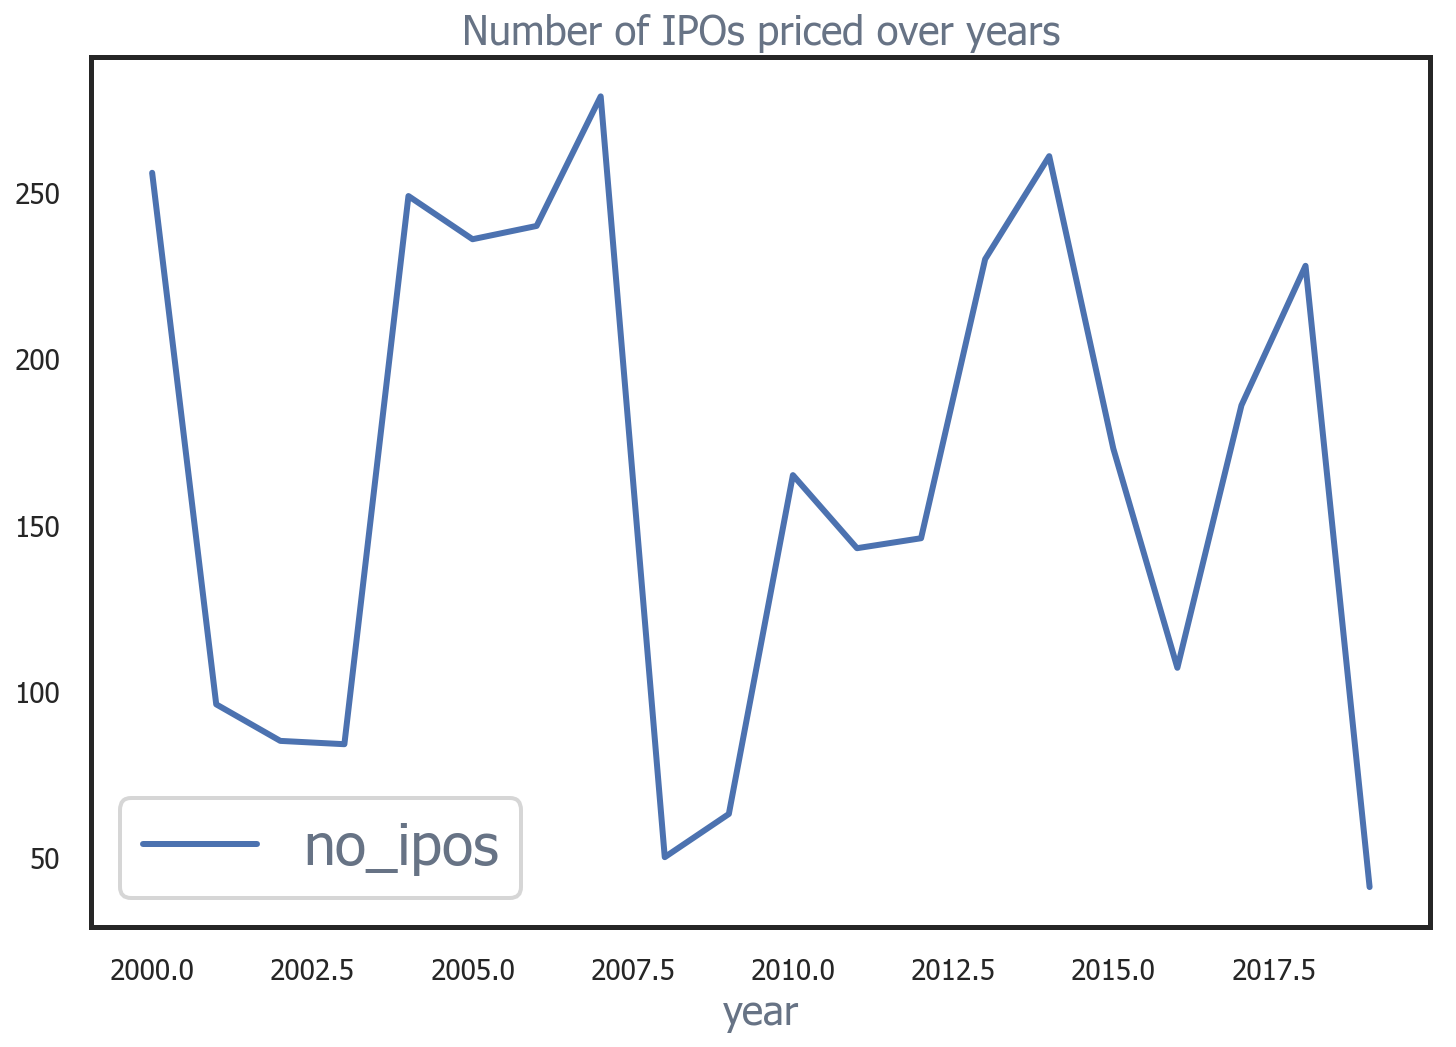

In [328]:
ipo_df.plot(x = 'year', y='no_ipos', title='Number of IPOs priced over years')

In [329]:
ipo_df

,year,no_ipos
0,2019,41
1,2018,228
2,2017,186
3,2016,107
4,2015,173
5,2014,261
6,2013,230
7,2012,146
8,2011,143
9,2010,165


## Aggregate

In [337]:
# Combine company_df, venture_rounds_df, unique_investors_df, acquirers_df, ipo_df

agg_df = pd.merge(company_df, venture_rounds_df, how='left', left_on='permalink', right_on='company_permalink')
agg_df = pd.merge(agg_df, unique_investors_df, how='left', left_on='permalink', right_on='company_permalink')
agg_df = pd.merge(agg_df, acquirers_df, how='left', left_on='permalink', right_on='permalink')
agg_df = pd.merge(agg_df, ipo_df, how='left', left_on='founded_year', right_on='year')
agg_df = agg_df.drop(['category_list','company_permalink_x', 'company_permalink_y', 'year'],axis=1)

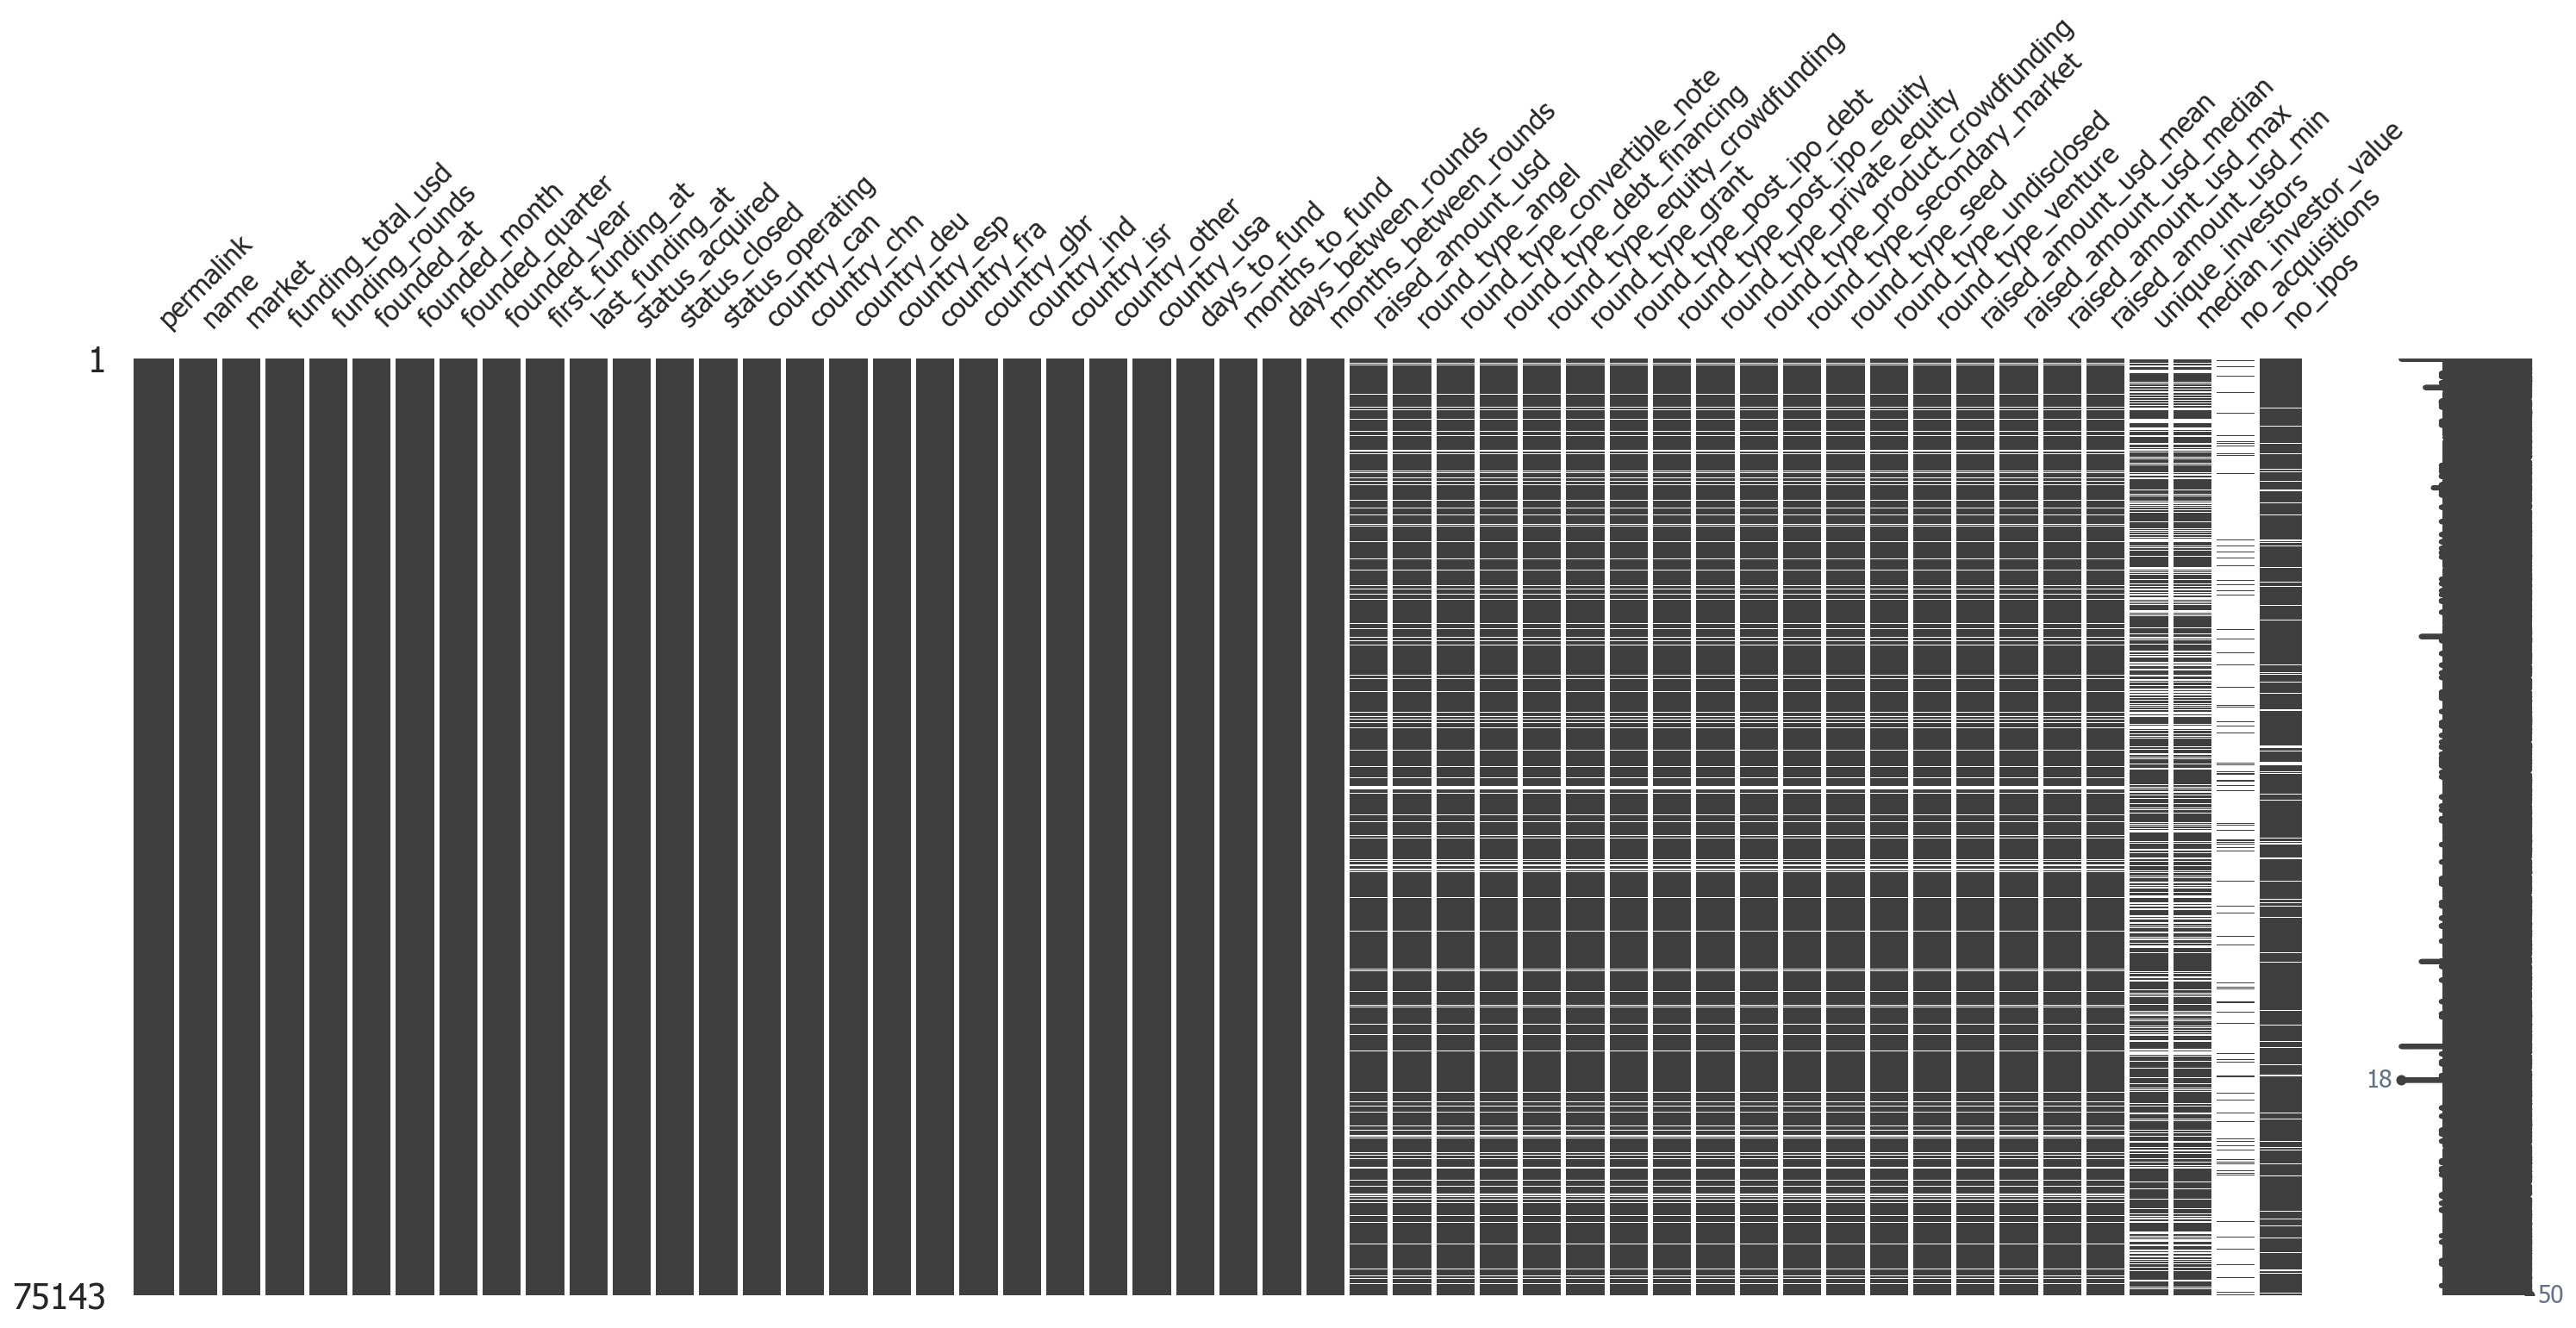

In [338]:
# Check for missing values

msno.matrix(agg_df)

In [339]:
# Check where most columns are NaN, most are becauses of 0 funding

agg_df[agg_df['unique_investors'].isna()].head()

,permalink,name,market,funding_total_usd,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,status_acquired,status_closed,status_operating,country_can,country_chn,country_deu,country_esp,country_fra,country_gbr,country_ind,country_isr,country_other,country_usa,days_to_fund,months_to_fund,days_between_rounds,months_between_rounds,raised_amount_usd,round_type_angel,round_type_convertible_note,round_type_debt_financing,round_type_equity_crowdfunding,round_type_grant,round_type_post_ipo_debt,round_type_post_ipo_equity,round_type_private_equity,round_type_product_crowdfunding,round_type_secondary_market,round_type_seed,round_type_undisclosed,round_type_venture,raised_amount_usd_mean,raised_amount_usd_median,raised_amount_usd_max,raised_amount_usd_min,unique_investors,median_investor_value,no_acquisitions,no_ipos
1,/organization/tv-communications,&tv communications,games,4000000,2,2008-12-10,12.0,4.0,2008.0,2010-06-04,2010-09-23,0,0,1,0,0,0,0,0,0,0,0,0,1,541.0,17.774492,55.5,1.823446,3000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2000000.0,2000000.0,3000000.0,1000000.0,NaN,NaN,NaN,50.0
2,/organization/tv-communications,&tv communications,games,4000000,2,2008-12-10,12.0,4.0,2008.0,2010-06-04,2010-09-23,0,0,1,0,0,0,0,0,0,0,0,0,1,541.0,17.774492,55.5,1.823446,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2000000.0,2000000.0,3000000.0,1000000.0,NaN,NaN,NaN,50.0
4,/organization/in-touch-network,(in)touch network,other,1500000,1,2011-04-01,4.0,2.0,2011.0,2011-04-01,2011-04-01,0,0,1,0,0,0,0,0,1,0,0,0,0,0.0,0.000000,0.0,0.000000,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1500000.0,1500000.0,1500000.0,1500000.0,NaN,NaN,NaN,143.0
5,/organization/r-ranch-and-mine,-r- ranch and mine,other,60000,2,2014-01-01,1.0,1.0,2014.0,2014-08-17,2014-09-26,0,0,1,0,0,0,0,0,0,0,0,0,1,228.0,7.490914,20.0,0.657098,10000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30000.0,30000.0,50000.0,10000.0,NaN,NaN,NaN,261.0
6,/organization/r-ranch-and-mine,-r- ranch and mine,other,60000,2,2014-01-01,1.0,1.0,2014.0,2014-08-17,2014-09-26,0,0,1,0,0,0,0,0,0,0,0,0,1,228.0,7.490914,20.0,0.657098,50000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30000.0,30000.0,50000.0,10000.0,NaN,NaN,NaN,261.0


In [340]:
# Impute with 0 as NaNs are for companies with 0 funding

agg_df = agg_df.fillna(0)

In [341]:
agg_df.head()

,permalink,name,market,funding_total_usd,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,status_acquired,status_closed,status_operating,country_can,country_chn,country_deu,country_esp,country_fra,country_gbr,country_ind,country_isr,country_other,country_usa,days_to_fund,months_to_fund,days_between_rounds,months_between_rounds,raised_amount_usd,round_type_angel,round_type_convertible_note,round_type_debt_financing,round_type_equity_crowdfunding,round_type_grant,round_type_post_ipo_debt,round_type_post_ipo_equity,round_type_private_equity,round_type_product_crowdfunding,round_type_secondary_market,round_type_seed,round_type_undisclosed,round_type_venture,raised_amount_usd_mean,raised_amount_usd_median,raised_amount_usd_max,raised_amount_usd_min,unique_investors,median_investor_value,no_acquisitions,no_ipos
0,/organization/waywire,#waywire,news,1750000,1,2012-06-01 00:00:00,6.0,2.0,2012.0,2012-06-30 00:00:00,2012-06-30 00:00:00,1,0,0,0,0,0,0,0,0,0,0,0,1,29.0,0.952792,29.0,0.952792,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1750000.0,1750000.0,1750000.0,1750000.0,6.0,9.0,0.0,146.0
1,/organization/tv-communications,&tv communications,games,4000000,2,2008-12-10 00:00:00,12.0,4.0,2008.0,2010-06-04 00:00:00,2010-09-23 00:00:00,0,0,1,0,0,0,0,0,0,0,0,0,1,541.0,17.774492,55.5,1.823446,3000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2000000.0,2000000.0,3000000.0,1000000.0,0.0,0.0,0.0,50.0
2,/organization/tv-communications,&tv communications,games,4000000,2,2008-12-10 00:00:00,12.0,4.0,2008.0,2010-06-04 00:00:00,2010-09-23 00:00:00,0,0,1,0,0,0,0,0,0,0,0,0,1,541.0,17.774492,55.5,1.823446,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2000000.0,2000000.0,3000000.0,1000000.0,0.0,0.0,0.0,50.0
3,/organization/rock-your-paper,'rock' your paper,other,40000,1,2012-10-26 00:00:00,10.0,4.0,2012.0,2012-08-09 00:00:00,2012-08-09 00:00:00,0,0,1,0,0,0,0,0,0,0,0,1,0,-78.0,-2.562681,-78.0,-2.562681,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40000.0,40000.0,40000.0,40000.0,1.0,8.0,0.0,146.0
4,/organization/in-touch-network,(in)touch network,other,1500000,1,2011-04-01 00:00:00,4.0,2.0,2011.0,2011-04-01 00:00:00,2011-04-01 00:00:00,0,0,1,0,0,0,0,0,1,0,0,0,0,0.0,0.000000,0.0,0.000000,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1500000.0,1500000.0,1500000.0,1500000.0,0.0,0.0,0.0,143.0


## Model building

## Conclusions

### Decisions Made

### Key Findings

### Next Steps

## Appendix

### Watermark

For full reproducibility of results, use exact data extraction as defined at top of notebook and ensure that the environment is exactly as follows:

In [335]:
# # ! pip install watermark
# %load_ext watermark
# %watermark -v -m --iversions -g